# TITANIC COMPETITION: First Kaggle Compet :)

## 1. Understand Data
## 2. Handle missing data
## 3. Feature Engineering
## 4. Compare ML models( Linear regression, KNN, Random forest, Support Vector Classifier..)
## 5. Parameter Tunning per model
## 6. Ensembles Classifier
## 7. Best results

In [124]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.metrics import accuracy_score

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [125]:
# Load the data
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")

# Check the data
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [126]:
#quick look at our data types & null counts 
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Age, Embarked and Cabin have "NAN" values especially Cabin which 204 non-null values so we need to fill in missing data for these features.

# Understand Data

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

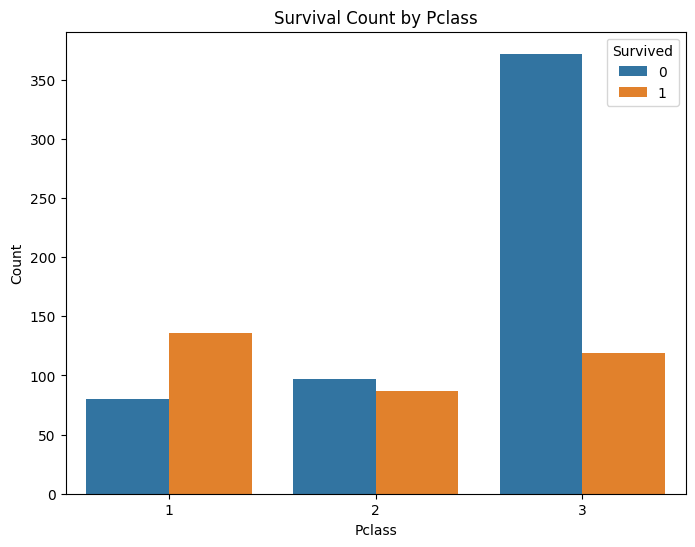

In [97]:
# Plot 1: Impact of Pclass on Survival

plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', hue='Survived', data=train_data)
plt.title('Survival Count by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right')
plt.show()

Impact of Pclass on Survival Higher class passengers (Pclass 1) had higher survival rates. This plot shows the survival counts by passenger class (Pclass), with more passengers in higher classes surviving compared to lower classes.

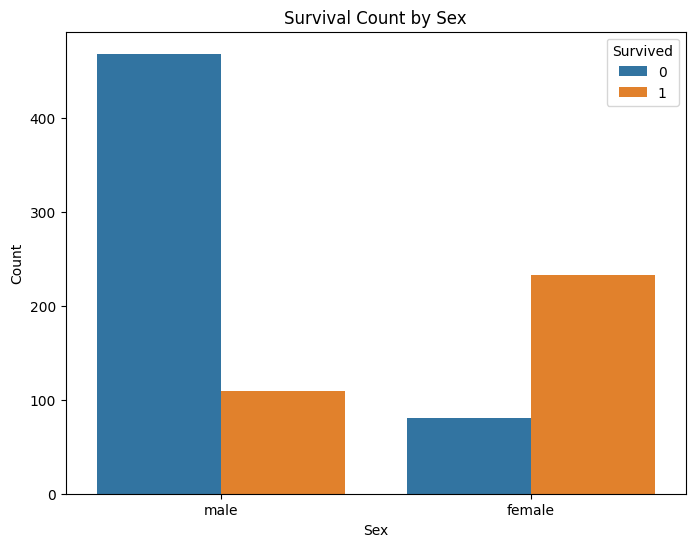

In [98]:
# Plot 2: Impact of Sex on Survival
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='Survived', data=train_data)
plt.title('Survival Count by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right')
plt.show()

Women survived way more than men. It is explained by prioritizing the survival of Women and children in the incident (conventional).

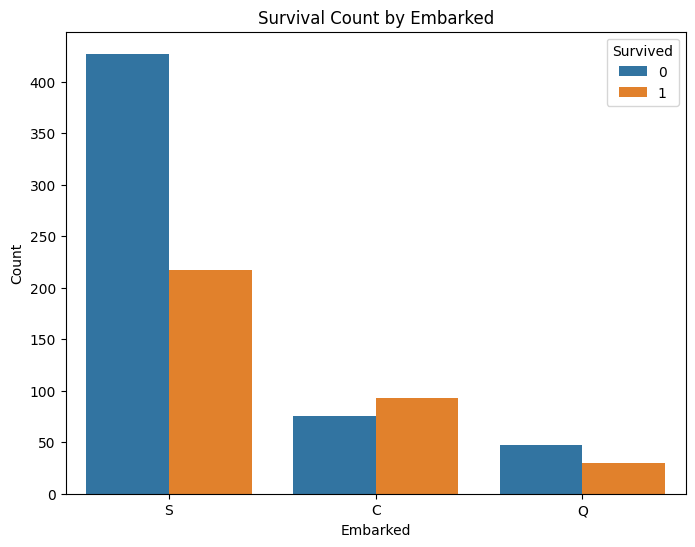

In [99]:
# Plot 3: Impact of Embarked on Survival
plt.figure(figsize=(8, 6))
sns.countplot(x='Embarked', hue='Survived', data=train_data)
plt.title('Survival Count by Embarked')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right')
plt.show()

Embarked S is the most dangerous

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


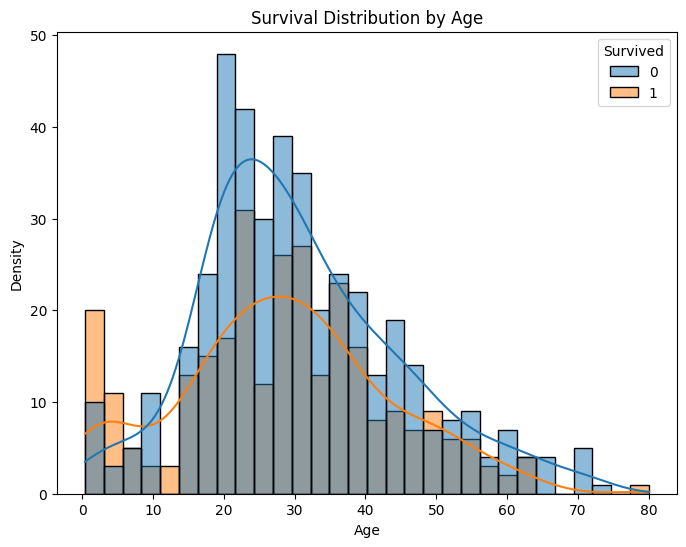

In [100]:
# Plot 4: Impact of Age on Survival
plt.figure(figsize=(8, 6))
sns.histplot(data=train_data, x='Age', hue='Survived', kde=True, bins=30)
plt.title('Survival Distribution by Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

Younger passengers had slightly higher survival rates. The distribution looks already normalized. 

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


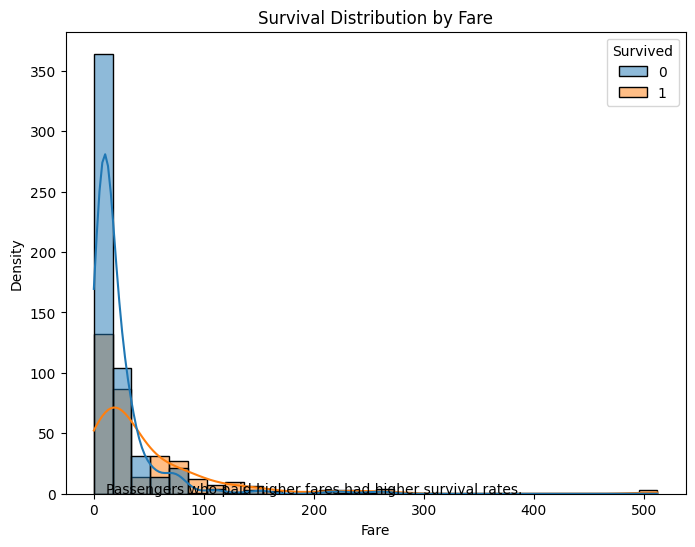

In [101]:
# Plot 5: Impact of Fare on Survival
plt.figure(figsize=(8, 6))
sns.histplot(data=train_data, x='Fare', hue='Survived', kde=True, bins=30)
plt.title('Survival Distribution by Fare')
plt.xlabel('Fare')
plt.ylabel('Density')
plt.text(200, 0.015, 'Passengers who paid higher fares had higher survival rates.', ha='center')
plt.show()

Higher fares, higher survival rate

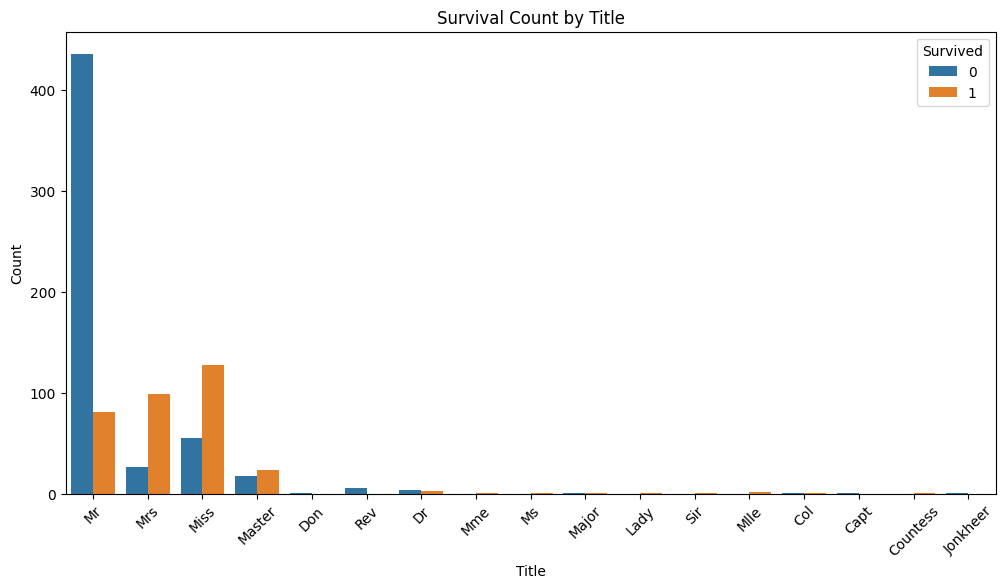

In [102]:
# Plot 7: Impact of Title on Survival
train_data['Title'] = train_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

plt.figure(figsize=(12, 6))
sns.countplot(x='Title', hue='Survived', data=train_data)
plt.title('Survival Count by Title')
plt.xlabel('Title')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Survived', loc='upper right')
plt.show()

Some Titles like Mrs and Miss impact the survival

# HANDLING MISSING DATA
We create a new feature Family size and Family group which would be helpful for Cabin imputing (applying the same cabin to the Family Group)

### - Cabin

FamilyGroup as feature is really important since it will have an impact on the survival.  

In [128]:
# Engineer the 'FamilySize' feature
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1

# Deriving gender from name
train_data['Title'] = train_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test_data['Title'] = test_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
# Extract last names
train_data['LastName'] = train_data['Name'].apply(lambda x: x.split(',')[0])
test_data['LastName'] = test_data['Name'].apply(lambda x: x.split(',')[0])

# Create a family group feature based on last names and family size
train_data['FamilyGroup'] = train_data['LastName'] + "_" + train_data['FamilySize'].astype(str)
test_data['FamilyGroup'] = test_data['LastName'] + "_" + test_data['FamilySize'].astype(str)

# Impute cabins based on the most common cabin for each family group
family_cabin_mapping = train_data.dropna(subset=['Cabin']).groupby('FamilyGroup')['Cabin'].agg(lambda x:x.value_counts().index[0])
train_data['Cabin'] = train_data.apply(lambda x: family_cabin_mapping.get(x['FamilyGroup'], x['Cabin']), axis=1)
test_data['Cabin'] = test_data.apply(lambda x: family_cabin_mapping.get(x['FamilyGroup'], x['Cabin']), axis=1)


### -Age & Embarked

In [129]:
# Calculate median ages for each Pclass and Sex combination
median_ages = train_data.groupby(['Pclass', 'Sex'])['Age'].median()

# Function to impute missing Age values
def impute_age(row):
    if pd.isnull(row['Age']):
        return median_ages.loc[row['Pclass'], row['Sex']]
    else:
        return row['Age']

# Apply the function to the Age column
train_data['Age'] = train_data.apply(impute_age, axis=1)

# Embarked: 
# Calculate the mode of the Embarked column
mode_embarked = train_data['Embarked'].mode()[0]

# Impute missing Embarked values with the mode
train_data['Embarked'] = train_data['Embarked'].fillna(mode_embarked)



# Feature Engineering

Using the plots descibed in the first step, we can keep Pclass, Embarked, Title, FamilyGroup and Cabin as features to consider.

In [130]:
# Select features and target
numerical_features = ['Pclass', 'Age']
categorical_features = ['Embarked','Title', 'FamilyGroup', 'Cabin']
X = train_data[numerical_features + categorical_features]
y = train_data['Survived']
X_test = test_data[numerical_features + categorical_features]

### Scaling and One-Hot encoding of Features data (Preprocessing)

In [131]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define preprocessing steps for numerical and categorical data
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])


# Compare Models & Parameters Tunning

We split data (cross-validation) and we do parameters Tunning 

In [132]:
from sklearn.model_selection import train_test_split
# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

### Linear Regression

In [133]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define the model
logistic_model = LogisticRegression(max_iter=1000)

# Create a pipeline for Logistic Regression
logistic_clf = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', logistic_model)])

# Define parameter grid for tuning
param_grid = {'model__C': [ 1, 10, 100, 200], 'model__penalty': [ 'l2']}

# Grid search for parameter tuning
grid_search = GridSearchCV(logistic_clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train and evaluate Logistic Regression model
logistic_clf_best = grid_search.best_estimator_
logistic_clf_best.fit(X_train, y_train)
logistic_score = logistic_clf_best.score(X_val, y_val)
print('Logistic Regression Accuracy:', logistic_score)


Best Parameters: {'model__C': 100, 'model__penalty': 'l2'}
Logistic Regression Accuracy: 0.8268156424581006


### Decision tree

In [109]:
from sklearn.tree import DecisionTreeClassifier

# Define the model
decision_tree_model = DecisionTreeClassifier()

# Create a pipeline for Decision Tree
decision_tree_clf = Pipeline(steps=[('preprocessor', preprocessor),
                                    ('model', decision_tree_model)])

# Define parameter grid for tuning
param_grid = {'model__max_depth': [None, 10, 20, 30, 40],
              'model__min_samples_split': [2, 5, 10],
              'model__min_samples_leaf': [1, 2, 4]}

# Grid search for parameter tuning
grid_search = GridSearchCV(decision_tree_clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print("Best Parameters for Decision Tree:", best_params)

# Train and evaluate Decision Tree model with best parameters
decision_tree_clf_best = grid_search.best_estimator_
decision_tree_clf_best.fit(X_train, y_train)
decision_tree_score = decision_tree_clf_best.score(X_val, y_val)
print('Decision Tree Accuracy:', decision_tree_score)



Best Parameters for Decision Tree: {'model__max_depth': 30, 'model__min_samples_leaf': 1, 'model__min_samples_split': 5}
Decision Tree Accuracy: 0.8156424581005587


### Random Forest

In [110]:
from sklearn.ensemble import RandomForestClassifier

# Define the model
random_forest_model = RandomForestClassifier()

# Create a pipeline for Random Forest
random_forest_clf = Pipeline(steps=[('preprocessor', preprocessor),
                                    ('model', random_forest_model)])

# Define parameter grid for tuning
param_grid = {'model__n_estimators': [100, 200, 300],
              'model__max_depth': [None, 10, 20, 30],
              'model__min_samples_split': [2, 5, 10],
              'model__min_samples_leaf': [1, 2, 4]}

# Grid search for parameter tuning
grid_search = GridSearchCV(random_forest_clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print("Best Parameters for Random Forest:", best_params)

# Train and evaluate Random Forest model with best parameters
random_forest_clf_best = grid_search.best_estimator_
random_forest_clf_best.fit(X_train, y_train)
random_forest_score = random_forest_clf_best.score(X_val, y_val)
print('Random Forest Accuracy:', random_forest_score)


Best Parameters for Random Forest: {'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 10, 'model__n_estimators': 300}
Random Forest Accuracy: 0.8044692737430168


## XGboost

In [111]:
from xgboost import XGBClassifier

# Define the model
xgb_model = XGBClassifier()

# Create a pipeline for XGBoost
xgb_clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('model', xgb_model)])

# Define parameter grid for tuning
param_grid = {'model__n_estimators': [100, 200, 300],
              'model__max_depth': [3, 4, 5],
              'model__learning_rate': [0.01, 0.1, 0.3],
              'model__subsample': [0.7, 0.8, 0.9],
              'model__colsample_bytree': [0.7, 0.8, 0.9]}

# Grid search for parameter tuning
grid_search = GridSearchCV(xgb_clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print("Best Parameters for XGBoost:", best_params)

# Train and evaluate XGBoost model with best parameters
xgb_clf_best = grid_search.best_estimator_
xgb_clf_best.fit(X_train, y_train)
xgb_score = xgb_clf_best.score(X_val, y_val)
print('XGBoost Accuracy:', xgb_score)


Best Parameters for XGBoost: {'model__colsample_bytree': 0.7, 'model__learning_rate': 0.01, 'model__max_depth': 3, 'model__n_estimators': 200, 'model__subsample': 0.8}
XGBoost Accuracy: 0.7932960893854749


### Support Vector 

In [112]:
from sklearn.svm import SVC

# Define the model
svc_model = SVC()

# Create a pipeline for SVC
svc_clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('model', svc_model)])

# Define parameter grid for tuning
param_grid = {'model__C': [0.1, 1, 10, 100],
              'model__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'model__gamma': ['scale', 'auto']}

# Grid search for parameter tuning
grid_search = GridSearchCV(svc_clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print("Best Parameters for SVC:", best_params)

# Train and evaluate SVC model with best parameters
svc_clf_best = grid_search.best_estimator_
svc_clf_best.fit(X_train, y_train)
svc_score = svc_clf_best.score(X_val, y_val)
print('SVC Accuracy:', svc_score)


Best Parameters for SVC: {'model__C': 1, 'model__gamma': 'scale', 'model__kernel': 'linear'}
SVC Accuracy: 0.8156424581005587


### K- Nearest neighbor

In [113]:
from sklearn.neighbors import KNeighborsClassifier

# Define the model
knn_model = KNeighborsClassifier()

# Create a pipeline for KNN
knn_clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('model', knn_model)])

# Define parameter grid for tuning
# Define parameter grid for tuning
param_grid = {'model__n_neighbors': [3, 5, 7, 9],
              'model__weights': ['uniform', 'distance'],
              'model__algorithm': ['brute']}


# Grid search for parameter tuning
grid_search = GridSearchCV(knn_clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print("Best Parameters for KNN:", best_params)

# Train and evaluate KNN model with best parameters
knn_clf_best = grid_search.best_estimator_
knn_clf_best.fit(X_train, y_train)
knn_score = knn_clf_best.score(X_val, y_val)
print('KNN Accuracy:', knn_score)


Best Parameters for KNN: {'model__algorithm': 'brute', 'model__n_neighbors': 9, 'model__weights': 'distance'}
KNN Accuracy: 0.7877094972067039


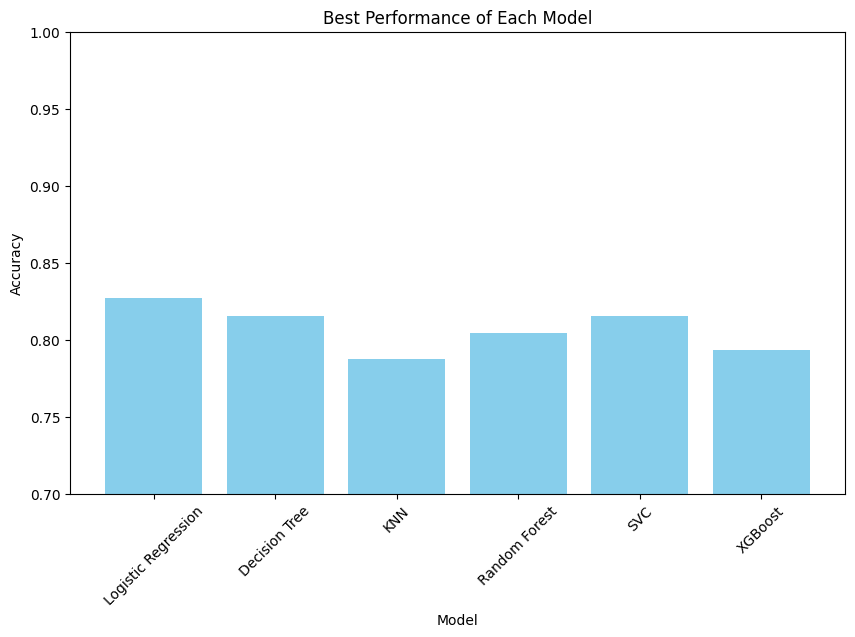

In [114]:
import matplotlib.pyplot as plt

# Accuracy scores of each model
accuracies = [ logistic_score, decision_tree_score, knn_score, random_forest_score, svc_score, xgb_score]
models = ['Logistic Regression', 'Decision Tree', 'KNN', 'Random Forest', 'SVC', 'XGBoost']

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color='skyblue')
plt.title('Best Performance of Each Model')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.7, 1.0)  # Set y-axis limits
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


# Ensembles

We conclude from the graph that Logistic regression, Random Forest and SVC give the best performance with more than 81% with best parameters. Lets try these for creating ensembles combinning these models. 

### Soft voting

## RF KNN SVM

In [115]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

# Define individual models with best parameters
logistic_model = LogisticRegression(C=2000, penalty='l2')
random_forest_model = RandomForestClassifier(max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=300)
svc_model = SVC(C=1, kernel='linear', gamma='scale')
knn_model = KNeighborsClassifier(algorithm='brute', n_neighbors=9, weights='distance')
xgb_model = XGBClassifier(n_estimators=200, max_depth=3, learning_rate= 0.01, subsample=0.8, colsample_bytree=0.7)


# Create a pipeline for the ensemble with the same preprocessor
voting_clf = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Using the same preprocessor
    ('classifier', VotingClassifier(estimators=[
        ('random_forest', random_forest_model),
        ('svc', svc_model),
        ('knn', knn_model)
    ], voting='hard'))  # Use 'hard' voting
])

# Fit the Voting Classifier ensemble
voting_clf.fit(X_train, y_train)
# Test the ensemble 5 times
ensemble_scores = []
for i in range(5):
    # Fit the Voting Classifier ensemble
    voting_clf.fit(X_train, y_train)

    # Evaluate the ensemble on the validation set
    ensemble_score = voting_clf.score(X_val, y_val)
    ensemble_scores.append(ensemble_score)



print('Ensemble Accuracy:', ensemble_scores)
# Calculate the average ensemble score
average_ensemble_score_voting_RF_KNN_SVM = sum(ensemble_scores) / len(ensemble_scores)
print('Average Ensemble Accuracy (5 iterations):', average_ensemble_score_voting_RF_KNN_SVM)



Ensemble Accuracy: [0.8156424581005587, 0.8100558659217877, 0.8100558659217877, 0.8100558659217877, 0.8156424581005587]
Average Ensemble Accuracy (5 iterations): 0.8122905027932961


## XGBOOST RF SVC

In [116]:
# Create a pipeline for the ensemble with the same preprocessor
voting_clf = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Using the same preprocessor
    ('classifier', VotingClassifier(estimators=[
        ('random_forest', random_forest_model),
        ('svc', svc_model),
        ('xgb', xgb_model)
        
    ], voting='hard'))  # Use 'hard' voting
])

# Fit the Voting Classifier ensemble
voting_clf.fit(X_train, y_train)
# Test the ensemble 5 times
ensemble_scores = []
for i in range(5):
    # Fit the Voting Classifier ensemble
    voting_clf.fit(X_train, y_train)
    # Evaluate the ensemble on the validation set
    ensemble_score = voting_clf.score(X_val, y_val)
    ensemble_scores.append(ensemble_score)

print('Ensemble Accuracy:', ensemble_scores)
# Calculate the average ensemble score
average_ensemble_score_voting_RF_XG_SVM = sum(ensemble_scores) / len(ensemble_scores)
print('Average Ensemble Accuracy (5 iterations):', average_ensemble_score_voting_RF_XG_SVM)


Ensemble Accuracy: [0.8100558659217877, 0.8212290502793296, 0.8156424581005587, 0.8268156424581006, 0.8156424581005587]
Average Ensemble Accuracy (5 iterations): 0.8178770949720671


## All models 

In [118]:
# Create a pipeline for the ensemble with the same preprocessor
voting_clf = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Using the same preprocessor
    ('classifier', VotingClassifier(estimators=[
        ('random_forest', random_forest_model),
        ('svc', svc_model),
        ('xgb', xgb_model),
        ('knn', knn_model),
        ('logistic', logistic_model)
    ], voting='hard'))  # Use 'hard' voting
])

# Fit the Voting Classifier ensemble
voting_clf.fit(X_train, y_train)
# Test the ensemble 5 times
ensemble_scores = []
for i in range(5):
    # Fit the Voting Classifier ensemble
    voting_clf.fit(X_train, y_train)
    # Evaluate the ensemble on the validation set
    ensemble_score = voting_clf.score(X_val, y_val)
    ensemble_scores.append(ensemble_score)

print('Ensemble Accuracy:', ensemble_scores)
# Calculate the average ensemble score
average_ensemble_score_voting_ALL = sum(ensemble_scores) / len(ensemble_scores)
print('Average Ensemble Accuracy (5 iterations):', average_ensemble_score_voting_ALL)


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Ensemble Accuracy: [0.8100558659217877, 0.8044692737430168, 0.8156424581005587, 0.8044692737430168, 0.8212290502793296]
Average Ensemble Accuracy (5 iterations): 0.811173184357542


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Stacking

### All models

In [119]:
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier

# Define individual models with best parameters
base_models = [
    ('logistic', LogisticRegression(C=100, penalty='l2')),
    ('random_forest', RandomForestClassifier(max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=300)),
    ('svc', SVC(C=1, kernel='linear', gamma='scale')),
    ('knn', KNeighborsClassifier(algorithm='brute', n_neighbors=9, weights='distance')),
    ('xgb', XGBClassifier(n_estimators=200, max_depth=3, learning_rate= 0.01, subsample=0.8, colsample_bytree=0.7))
]
  # Define meta-model
meta_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Create Stacking Classifier ensemble
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Create a pipeline for the ensemble with the same preprocessor
stacking_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Using the same preprocessor
    ('classifier', stacking_clf)
])

# Test the ensemble 5 times
ensemble_scores = []
for i in range(5):
    # Fit the Stacking Classifier ensemble
    stacking_pipeline.fit(X_train, y_train)

    # Evaluate the ensemble on the validation set
    ensemble_score = stacking_pipeline.score(X_val, y_val)
    ensemble_scores.append(ensemble_score)
    
print('Ensemble Accuracy:', ensemble_scores)
# Calculate the average ensemble score
average_ensemble_score_Stack_ALL = sum(ensemble_scores) / len(ensemble_scores)
print('Average Ensemble Accuracy (5 iterations):', average_ensemble_score_Stack_ALL)


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Ensemble Accuracy: [0.8212290502793296, 0.8268156424581006, 0.8379888268156425, 0.8156424581005587, 0.8044692737430168]
Average Ensemble Accuracy (5 iterations): 0.8212290502793296


### KNN RF SVM

In [120]:
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier

# Define individual models with best parameters
base_models = [
    ('random_forest', RandomForestClassifier(max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=300)),
    ('svc', SVC(C=1, kernel='linear', gamma='scale')),
    ('knn', KNeighborsClassifier(algorithm='brute', n_neighbors=9, weights='distance'))
]
  # Define meta-model
meta_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Create Stacking Classifier ensemble
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Create a pipeline for the ensemble with the same preprocessor
stacking_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Using the same preprocessor
    ('classifier', stacking_clf)
])

# Test the ensemble 5 times
ensemble_scores = []
for i in range(5):
    # Fit the Stacking Classifier ensemble
    stacking_pipeline.fit(X_train, y_train)

    # Evaluate the ensemble on the validation set
    ensemble_score = stacking_pipeline.score(X_val, y_val)
    ensemble_scores.append(ensemble_score)
    
print('Ensemble Accuracy:', ensemble_scores)
# Calculate the average ensemble score
average_ensemble_score_Stack_KNN_RF_SVM = sum(ensemble_scores) / len(ensemble_scores)
print('Average Ensemble Accuracy (5 iterations):', average_ensemble_score_Stack_KNN_RF_SVM)


Ensemble Accuracy: [0.8435754189944135, 0.8324022346368715, 0.8212290502793296, 0.8212290502793296, 0.8212290502793296]
Average Ensemble Accuracy (5 iterations): 0.8279329608938548


### XGBOOST RF SVM

In [121]:
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier

# Define individual models with best parameters
base_models = [
    ('random_forest', RandomForestClassifier(max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=300)),
    ('svc', SVC(C=1, kernel='linear', gamma='scale')),
    ('xgb', XGBClassifier(n_estimators=200, max_depth=3, learning_rate= 0.01, subsample=0.8, colsample_bytree=0.7))
]
  # Define meta-model
meta_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Create Stacking Classifier ensemble
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Create a pipeline for the ensemble with the same preprocessor
stacking_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Using the same preprocessor
    ('classifier', stacking_clf)
])

# Test the ensemble 5 times
ensemble_scores = []
for i in range(5):
    # Fit the Stacking Classifier ensemble
    stacking_pipeline.fit(X_train, y_train)

    # Evaluate the ensemble on the validation set
    ensemble_score = stacking_pipeline.score(X_val, y_val)
    ensemble_scores.append(ensemble_score)
    
print('Ensemble Accuracy:', ensemble_scores)
# Calculate the average ensemble score
average_ensemble_score_Stack_RF_XG_SVM = sum(ensemble_scores) / len(ensemble_scores)
print('Average Ensemble Accuracy (5 iterations):', average_ensemble_score_Stack_RF_XG_SVM)


Ensemble Accuracy: [0.8379888268156425, 0.8268156424581006, 0.8324022346368715, 0.8212290502793296, 0.8435754189944135]
Average Ensemble Accuracy (5 iterations): 0.8324022346368716


### Comparaison Ensembles 

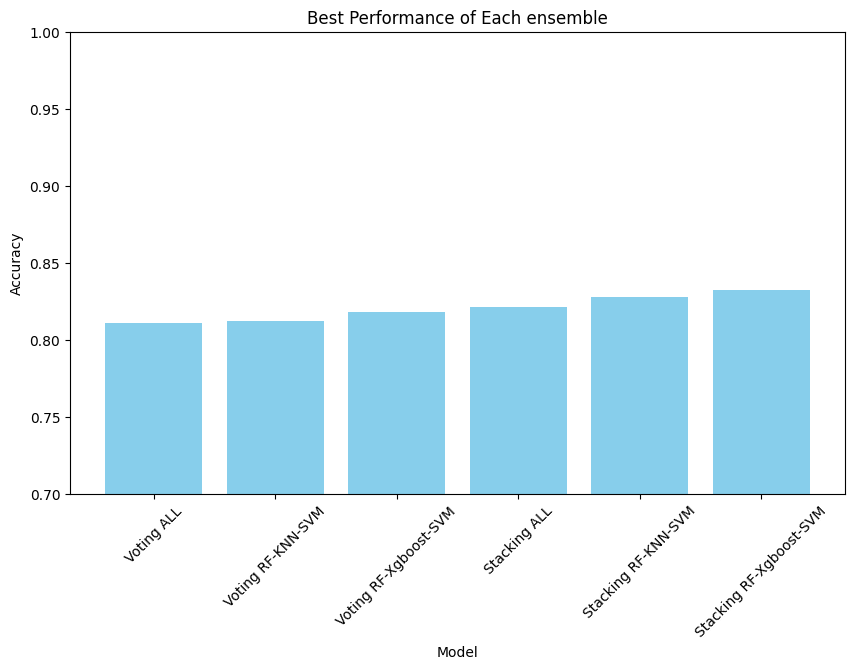

In [122]:

# Accuracy scores of each model
accuracies = [ average_ensemble_score_voting_ALL, average_ensemble_score_voting_RF_KNN_SVM, average_ensemble_score_voting_RF_XG_SVM, average_ensemble_score_Stack_ALL, average_ensemble_score_Stack_KNN_RF_SVM, average_ensemble_score_Stack_RF_XG_SVM]
models = ['Voting ALL', 'Voting RF-KNN-SVM', 'Voting RF-Xgboost-SVM', 'Stacking ALL', 'Stacking RF-KNN-SVM', 'Stacking RF-Xgboost-SVM']

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color='skyblue')
plt.title('Best Performance of Each ensemble')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.7, 1.0)  # Set y-axis limits
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

 # Best result: Ensemble Stacking :Random forest, Xgboost and SVM has the best performance with 83.2 %